# PCA compund data

- tanh and sinusodials


wobble [m] = -129.55462171461122 128.84563340824565


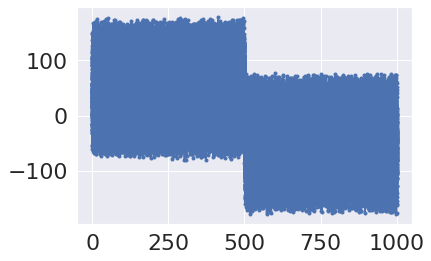

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt

Fs = 200 # Sampling Frequency
tstep = 1/Fs # sample time interval
f0 = 1 # signal frequency

Cycles = 1000
N = Cycles * Fs//f0 # number of samples

t = np.linspace(0, (N-1)*tstep, N)  # time steps

fstep = Fs/N

f = np.linspace(0, (N-1)*fstep, N) # frequency steps

d = -50 * np.tanh((t-500))
#d0 = np.tanh(t)
d1 = 100 * np.cos(2 * 1 * np.pi * t ) 
d2 = 30 * np.cos(2 * 5 * np.pi * t )

d_wobble =  100 * np.random.uniform(0, 1, N) * np.cos(2 * 1 * np.pi * t ) + 30  * np.random.uniform(0, 1, N) *np.cos(2 * 5 * np.pi * t )# inches
print("wobble [m] =", d_wobble.min(), d_wobble.max())
d = d + d_wobble



plt.scatter( t, d, s = 1)


#f = np.linspace(0, (N-1)*fstep, N) # frequency steps

y = d
# plt.xlim([490,510])
plt.plot(t,y, '.-')

Text(0.5, 1.0, 'FFT - sample frequency 1000 Hz')

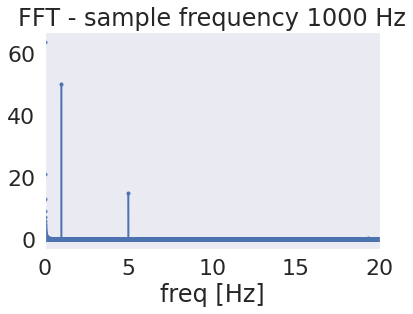

In [130]:
# perform fft
X = np.fft.fft(y)
X_mag = np.abs(X)/N
# consider Nyquist - only use half the sample freq
f_plot = f[0: int(N/2+1)]
X_mag_plot = 2 * X_mag[0: int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2 # correct DC magnitude
plt.plot(f_plot,X_mag_plot, '.-')
plt.grid()
plt.xlabel("freq [Hz]")
plt.xlim([0,20])
plt.title("FFT - sample frequency 1000 Hz")

In [131]:
t.shape, y.shape, f_plot.shape,  N

((200000,), (200000,), (100001,), 200000)

[0.9158198  0.069755   0.01037193 0.00405327]
[130590.81576069  36040.87319636  13897.52236863   8687.81104161]


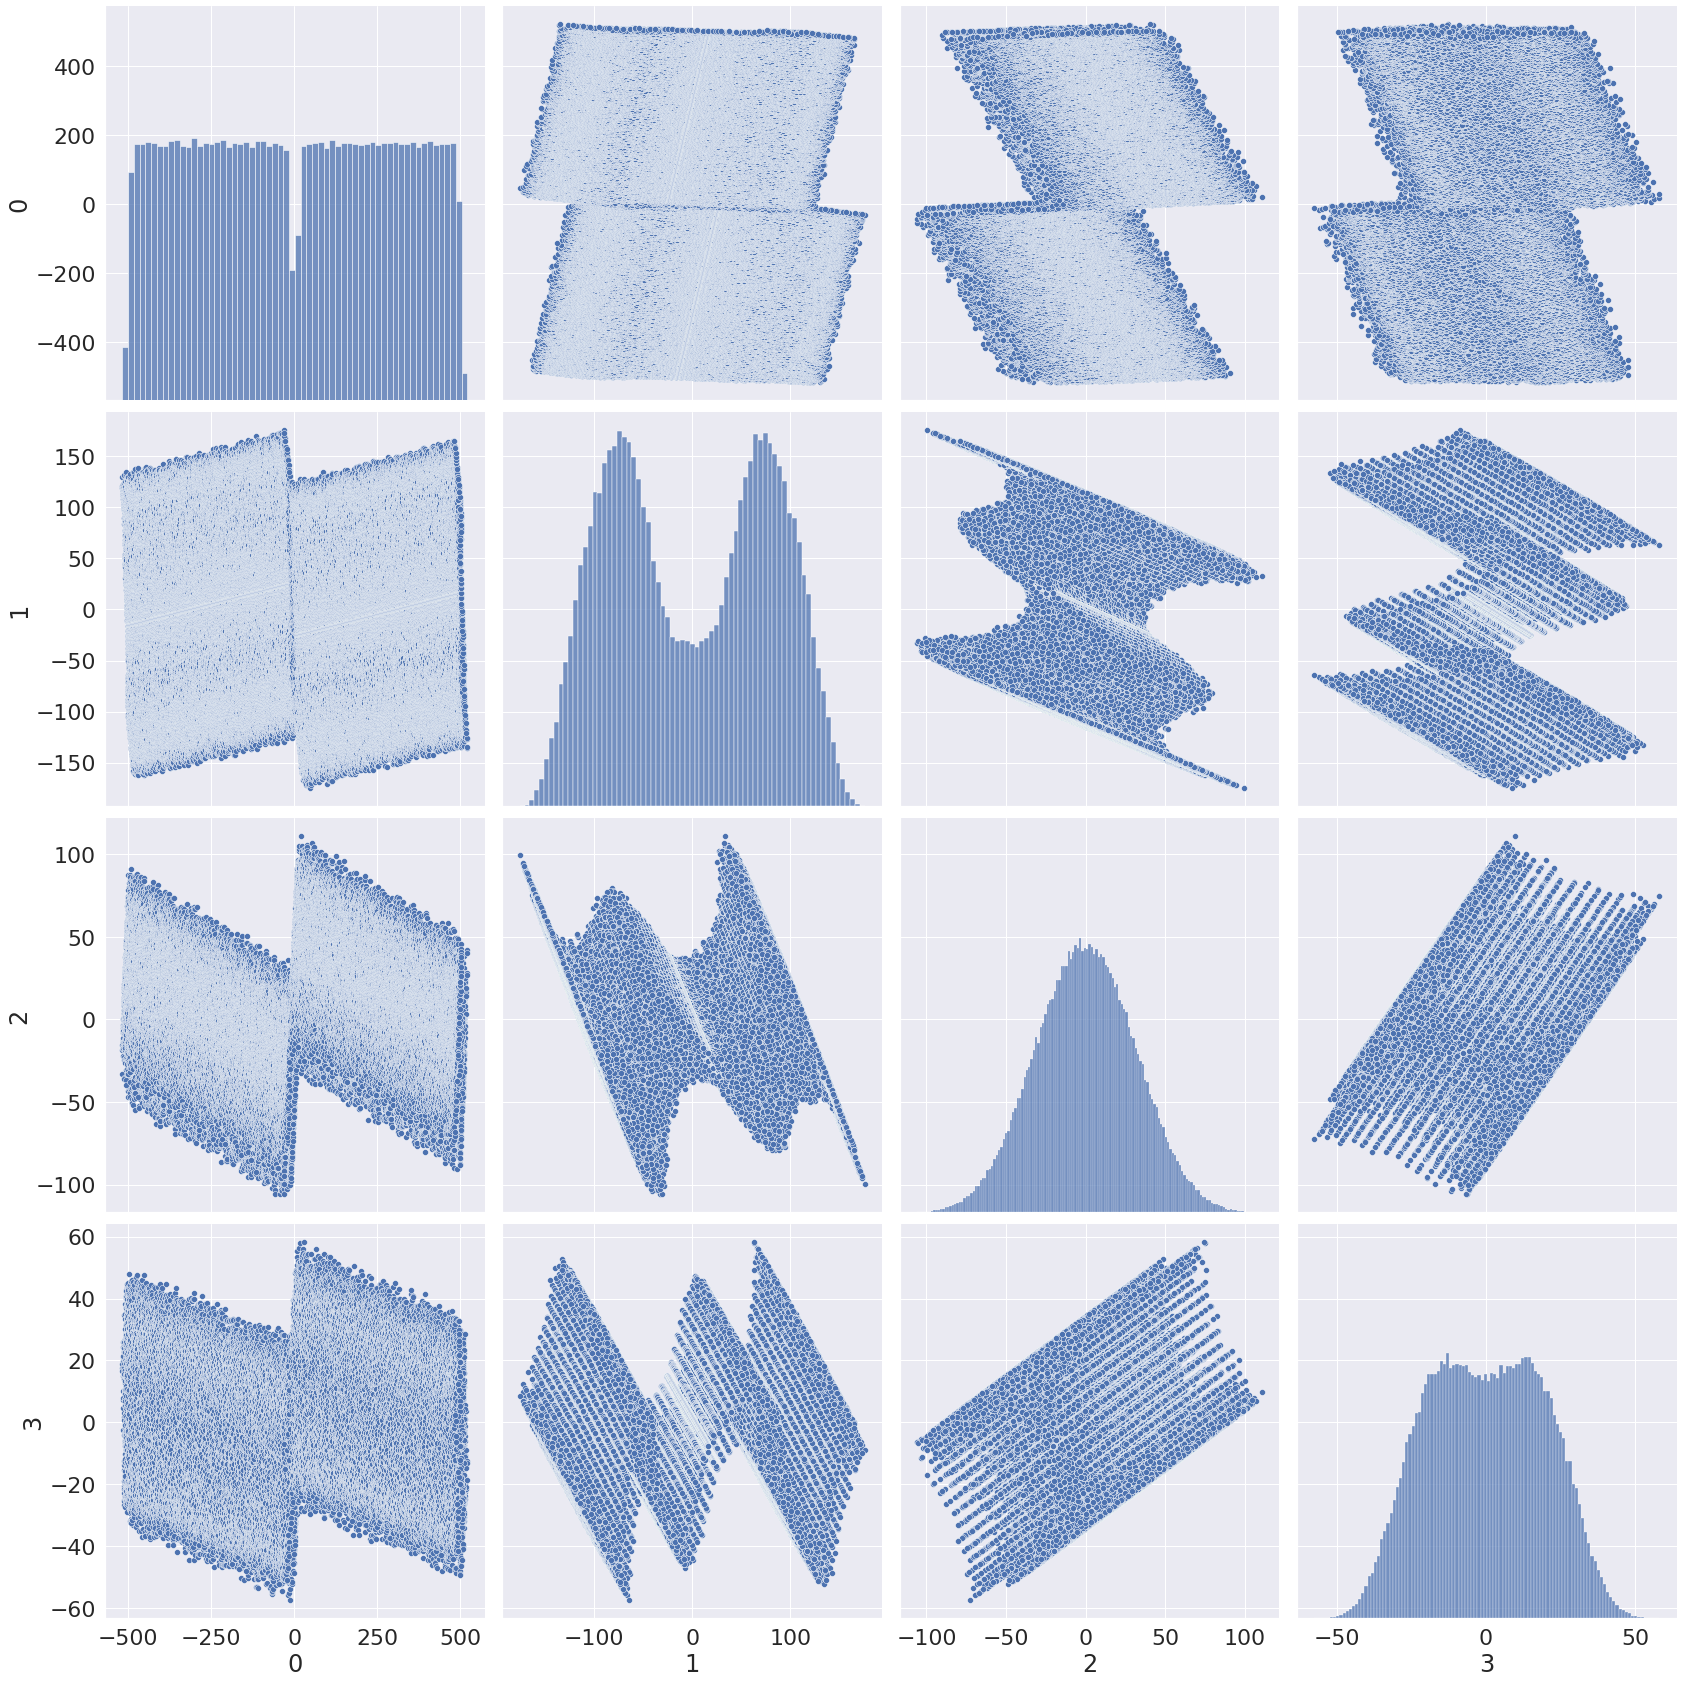

In [148]:
from sklearn.decomposition import PCA
import seaborn as sns
X = np.stack([t,d, d1, d2], axis=0).T
pca = PCA(n_components=4)
PCA_X = pd.DataFrame( pca.fit_transform(X))

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

sns.pairplot(PCA_X, height=6)

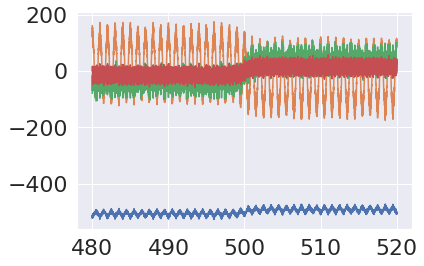

In [186]:
z = 4000
C = 100000
plt.plot(t[C- z:C + z], (PCA_X[0] -t)[C - z:C + z] )
plt.plot(t[C- z:C + z], (PCA_X[1] )[C - z:C + z] )
plt.plot(t[C- z:C + z], (PCA_X[2] )[C - z:C + z] )
plt.plot(t[C- z:C + z], (PCA_X[3] )[C - z:C + z] )

In [157]:
import numpy as np
import matplotlib.pyplot as plt

def create_fir_filter(num_taps, cutoff_frequency, sampling_rate):
    # Normalized cutoff frequency
    normalized_cutoff = 2 * cutoff_frequency / sampling_rate

    # Create an array of tap indices
    indices = np.arange(-num_taps // 2, num_taps // 2 + 1)

    # Calculate the sinc filter
    sinc_filter = np.sinc(normalized_cutoff * indices)

    # Apply a window function (Hann window)
    window = np.hanning(len(sinc_filter))
    fir_filter = sinc_filter * window
    return fir_filter

num_taps = 101
cutoff_frequency = 10
sampling_rate = 100
filter_coefficients = create_fir_filter(num_taps, cutoff_frequency, sampling_rate)
plt.plot(filter_coefficients)
plt.title('FIR Filter Coefficients')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)

0        -511.070483
1        -510.751093
2        -508.552029
3        -517.506753
4        -517.045238
             ...    
199995   -506.832632
199996   -514.391018
199997   -504.732462
199998   -515.525539
199999   -502.731094
Name: 0, Length: 200000, dtype: float64

In [158]:
t.shape, PCA2_X[0].shape

((200000,), (200000,))

(200, 200000)

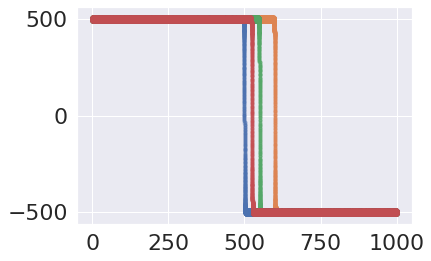

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt

Fs = 200 # Sampling Frequency
tstep = 1/Fs # sample time interval
f0 = 1 # signal frequency

Cycles = 1000
N = Cycles * Fs//f0 # number of samples

t = np.linspace(0, (N-1)*tstep, N)  # time steps

fstep = Fs/N

f = np.linspace(0, (N-1)*fstep, N) # frequency steps

# ampTanh = np.array( [50,55,35,60] )*10
# offTanh = np.array( [500, 600, 550, 525] )
# amp1 = np.array( [100,120,-90,92] )/10
# amp2 = np.array( [30,-20,32,35] )/10
# freq1 = np.array( [10,11,9,15] )/10
# freq2 = np.array( [19,18,20,17] )/10
ampTanh = np.array( [50]*4)*10
offTanh = np.array( [500, 600, 550, 525] )
amp1 = np.array( [100]*4 )/10
amp2 = np.array( [-20]*4 )/10
freq1 = np.array( [10]*4 )/10
freq2 = np.array( [13]*4)/10
curve = []

for i in range(len(amp1)):
    d = ampTanh[i] * -1 * np.tanh(t - offTanh[i])
    d_wobble =  amp1[i] * np.random.uniform(0,1,N) * np.cos(2*freq1[i]*np.pi*t) + amp2[i]*np.random.uniform(0,1,N)*np.cos(freq2[i]*5*np.pi*t)# inches
    curve.append(d + d_wobble)
for i in range(len(amp1)):    
    plt.plot(t,curve[i], '.-', alpha = .25)

In [221]:
y = np.array(curve).T
y.shape, f.shape

((200000, 4), (200000,))

Text(0.5, 1.0, 'FFT - sample frequency 200 Hz')

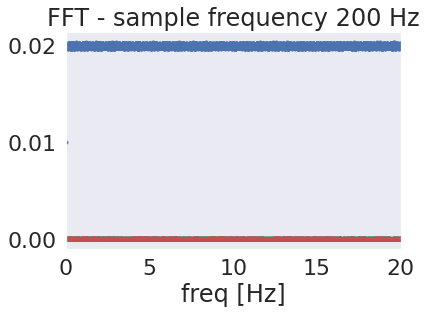

In [222]:
# perform fft
X = np.fft.fft(y)
X_mag = np.abs(X)/N
# consider Nyquist - only use half the sample freq
f_plot = f[0: int(N/2+1)]
X_mag_plot = 2 * X_mag[0: int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2 # correct DC magnitude
plt.plot(f_plot,X_mag_plot, '.-')
plt.grid()
plt.xlabel("freq [Hz]")
plt.xlim([0,20])
plt.title(f"FFT - sample frequency {Fs} Hz")

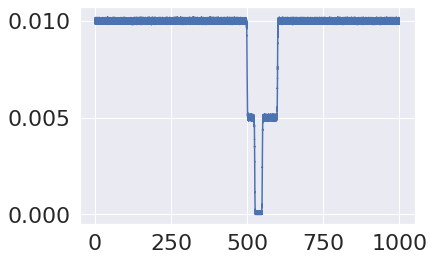

In [223]:
plt.plot(t,X_mag[:,0])

[0.91670911 0.0462807  0.01825084 0.01179894 0.00696041]
[442559.86556587  99438.87688286  62445.00890679  50208.56111692
  38563.24830615]


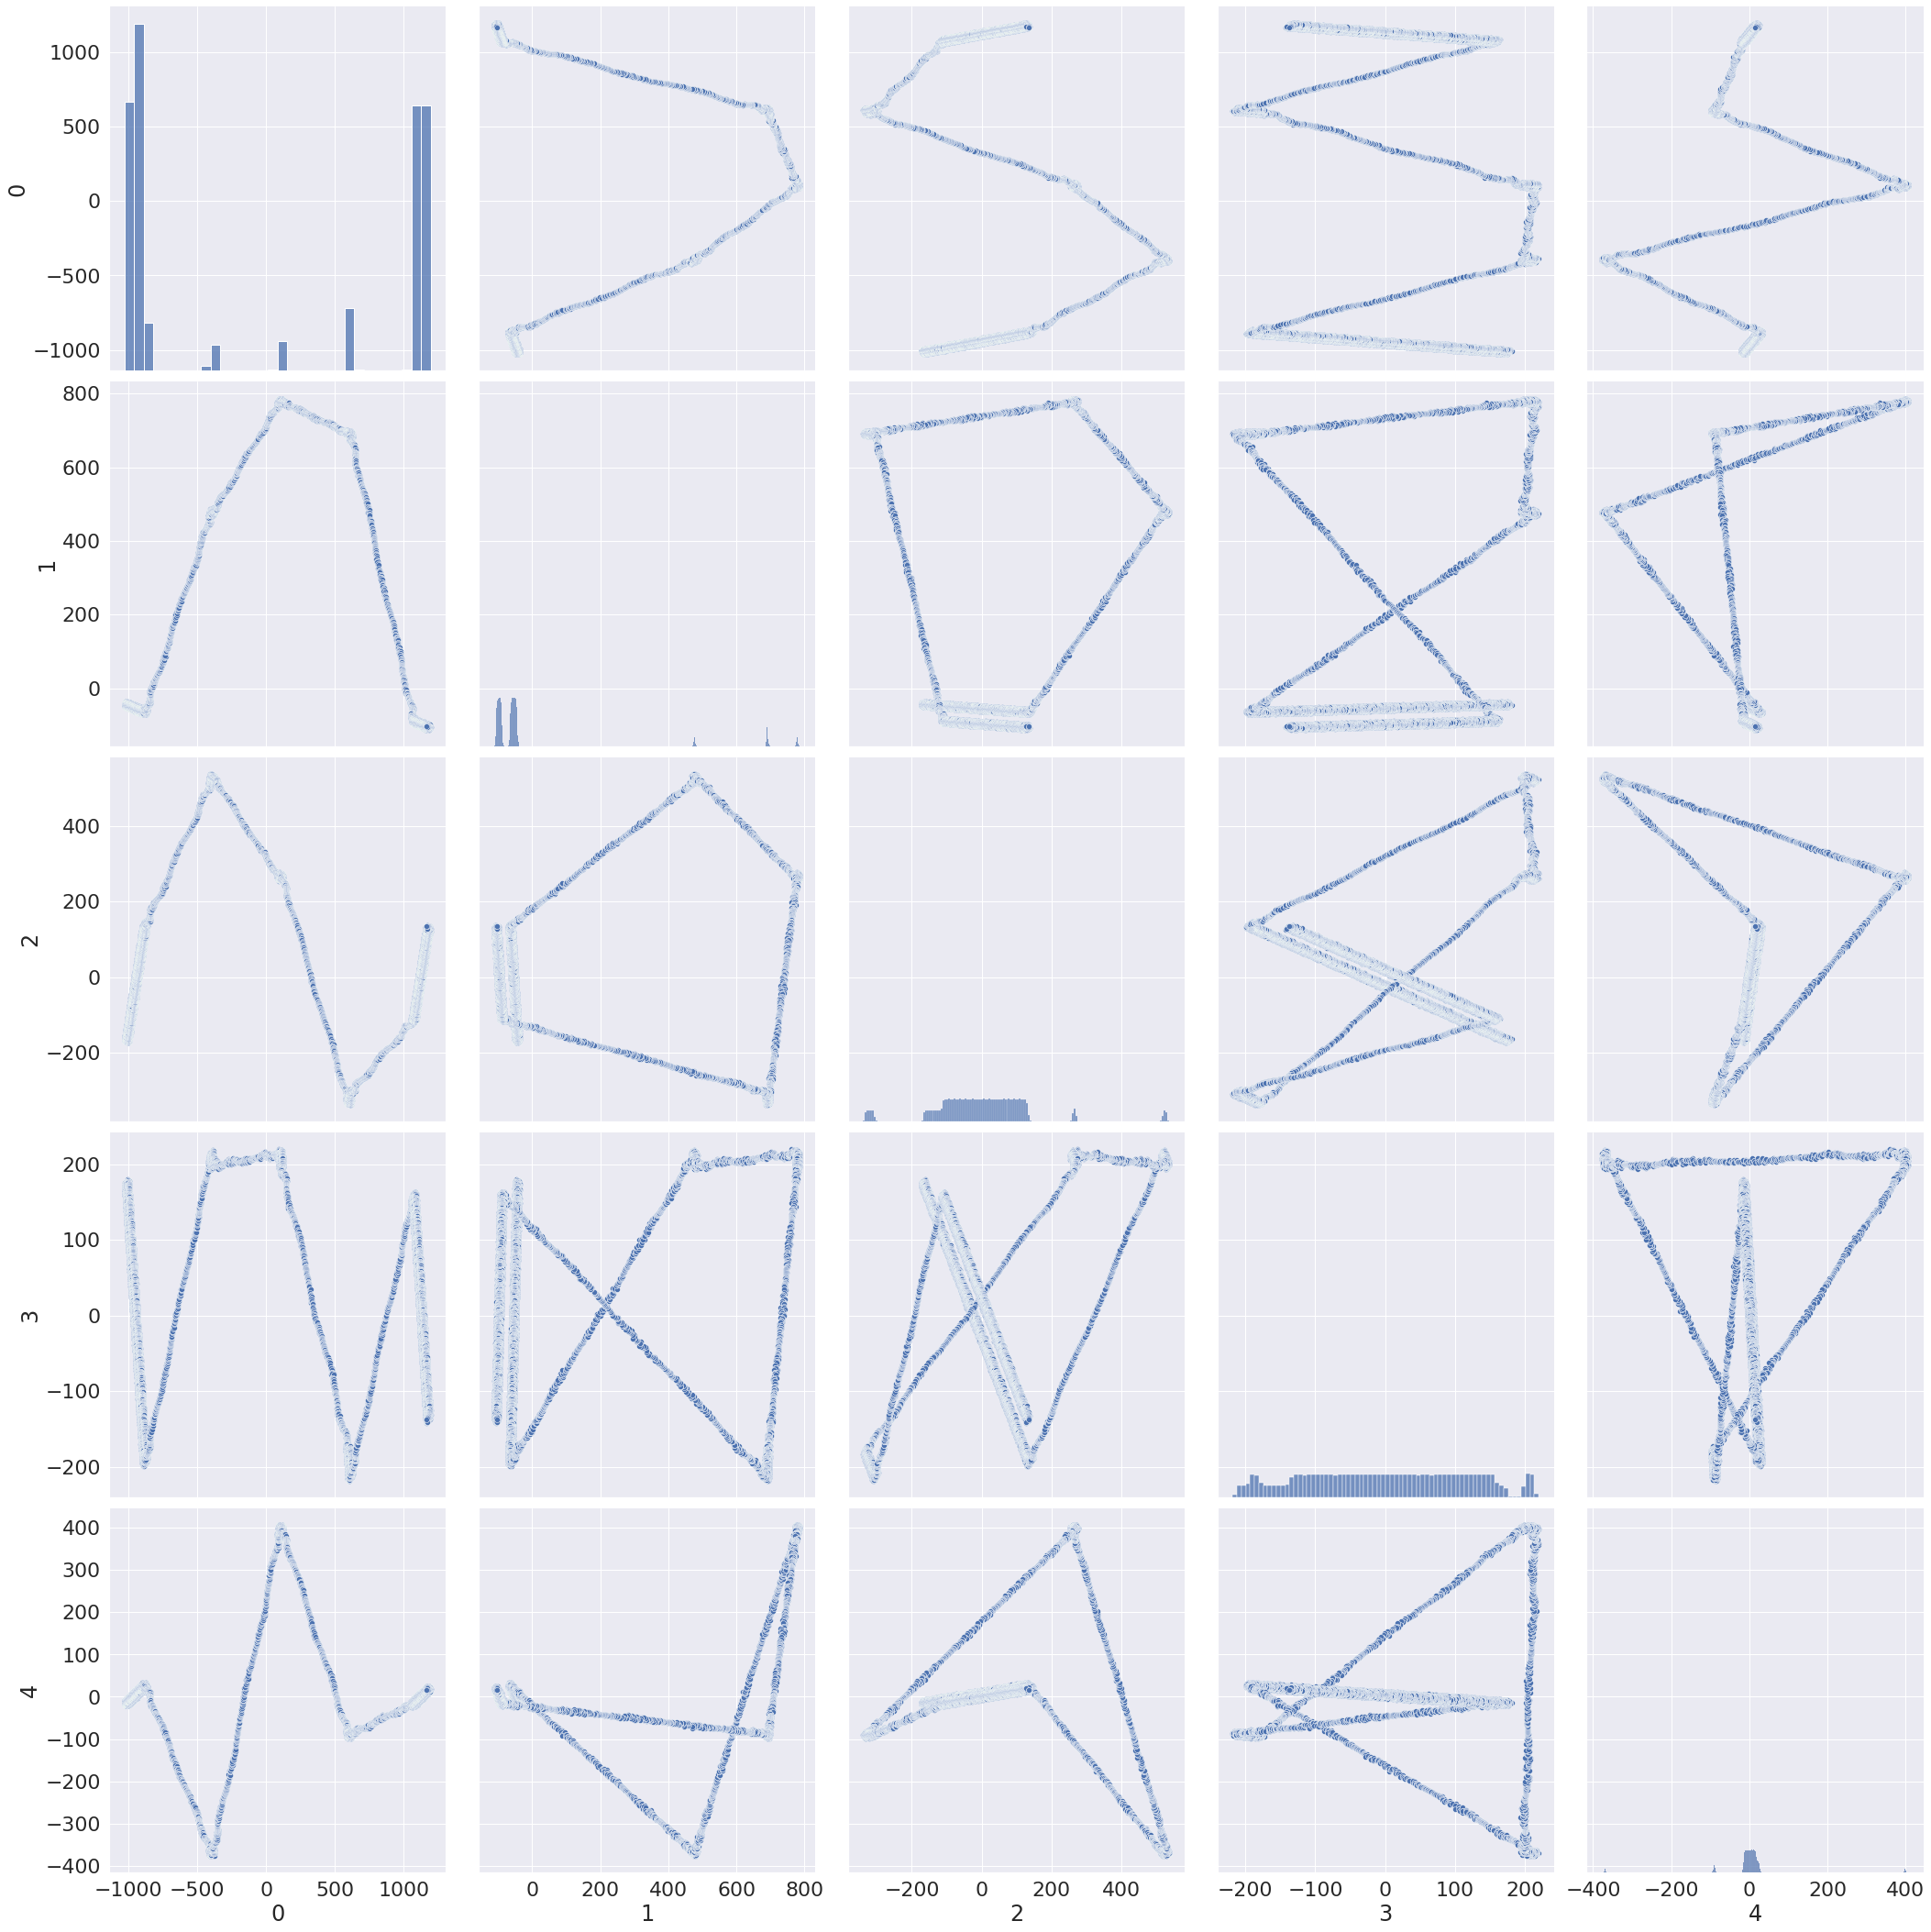

In [227]:
from sklearn.decomposition import PCA
import seaborn as sns
X = np.stack([t,y.T[0],y.T[1],y.T[2],y.T[3]], axis=0)
pca = PCA(n_components=5)
PCA_X = pd.DataFrame( pca.fit_transform(X.T))

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

sns.pairplot(PCA_X, height=6)

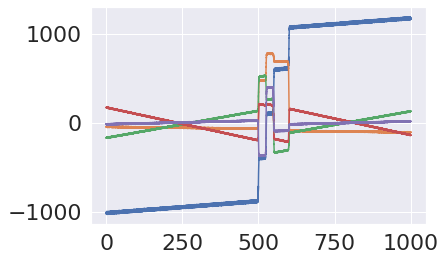

In [229]:
for i in range(5):
    plt.plot(t, PCA_X[i])
